# Real-World Restaurant Sales & Performance Analysis

In [27]:
import pandas as pd
import numpy as np

In [28]:
data=pd.read_csv("/content/drive/MyDrive/Dataset ML/Data.csv")
data

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,2023-07-01,2023-07-01 15:17:24,26194,Lemon Soda,50.0,1.0,50.0,0.0,2.50,52.50,3,biller,0,NaN,Deserts & Mocktails,NaN
7238,2023-07-01,2023-07-01 15:17:24,26194,Mineral Water,20.0,1.0,20.0,0.0,1.00,21.00,3,biller,0,NaN,Deserts & Mocktails,NaN
7239,2023-07-01,2023-07-01 13:12:54,26193,Lemon Soda,50.0,3.0,150.0,0.0,7.50,157.50,10,biller,0,NaN,Deserts & Mocktails,NaN
7240,2023-07-01,2023-07-01 13:08:33,26192,Oreo Milk Shake,120.0,1.0,120.0,0.0,6.00,126.00,4,biller,0,NaN,Deserts & Mocktails,NaN


** date - Higest average sales - 19.07.23 - 319**

In [31]:
a=data[data['Date']=='2023-07-19']
highest_avg = data.groupby('Date')['Final Total'].mean().sort_values(ascending=False)
print(highest_avg.head(1))

Date
2023-07-19    319.837857
Name: Final Total, dtype: float64


**bold text how many total bill are there?**

In [32]:
data['Invoice No.'].nunique()

2199

** most sold item of semtember month**

In [33]:
a=data[(data['Date']>='2023-09-01') & (data['Date']<='2023-09-30')]
quantity = data.groupby("Item Name")["Qty."].sum().sort_values(ascending=False)
print(quantity.head())

Item Name
Chicken Biriyani With Raitha And Gravy    860.0
Mineral Water                             694.0
Butter Naan                               490.0
Romali Roti (1 No)                        417.0
Chicken Fried Rice                        400.0
Name: Qty., dtype: float64


**which 3 category item is sold less in the month of july? (bar chart)**

In [34]:
b=data[(data['Date']>='2023-07-01') & (data['Date']<='2023-07-31')]
quantity = data.groupby("Category")["Qty."].sum().sort_values(ascending=True)
print(quantity.head(3))

Category
NON VEG STARTERS MUTTON      1.0
Non Veg combos              30.0
Veg Soup                   115.0
Name: Qty., dtype: float64


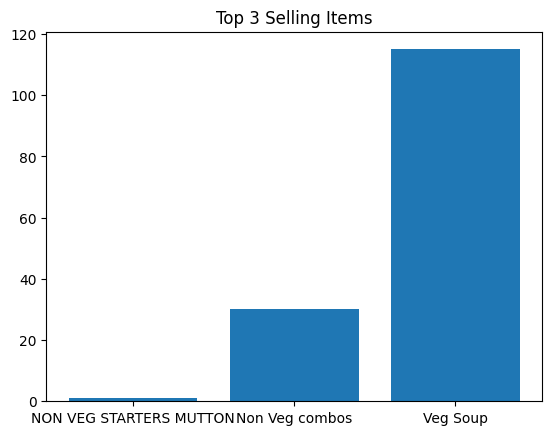

In [35]:
import matplotlib.pyplot as plt
plt.bar(quantity.head(3).index, quantity.head(3))
plt.title('Top 3 Selling Items')
plt.show()

**pie chart for the sales by categroy**

In [36]:
sales = data.groupby('Category')['Final Total'].sum()
print(sales)

Category
Deserts & Mocktails          51517.47
Indian Breads               117623.56
NON VEG BRIYANI & RICE      379502.88
NON VEG STARTERS CHICKEN    190550.96
NON VEG STARTERS EGG          7272.36
NON VEG STARTERS FISH        37488.48
NON VEG STARTERS MUTTON        250.96
Non Veg Gravy               122743.76
Non Veg Soup                 27721.66
Non Veg Tandoor              51633.04
Non Veg combos                6857.56
VEG BIRYANI & RICE           93072.70
Veg Gravy                    54492.10
Veg Soup                      9581.88
Veg Starters                 57827.22
Name: Final Total, dtype: float64


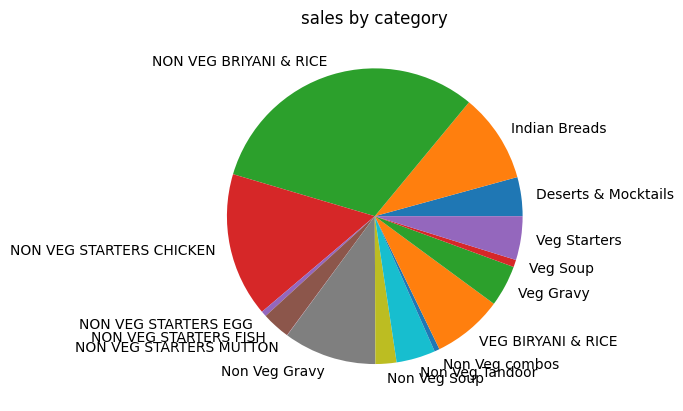

In [40]:
plt.pie(sales,labels=sales.index)
plt.title("sales by category")
plt.show()

**what is AOV of the resturant (average order value) total amount / no of bills - 549.40**

In [39]:
aov=data['Final Total'].mean()
print(" Average order value of the resturant : ",aov)

 Average order value of the resturant :  166.8236108809721
